In [12]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from IPython.display import Image, display
# from PIL import Image
import CoolProp.CoolProp as CP
from CoolProp.Plots import PropertyPlot
from analysis_functions import *
import optimization_functions as of
import warnings
from importlib import reload 
from scipy.optimize import root_scalar
plt.close('all')
# %matplotlib widget

In [13]:
path = 'C:/Users/charl/Google Drive/school/Graduate/Pod Project/Prototype/'
modelData = pd.read_pickle(path + 'modelDataframe.pkl')

In [14]:
controlData = pd.read_pickle(path + 'controlDataframe.pkl')

# optimizeData = pd.DataFrame()

# for index, row in controlData.iterrows():
    
#     Var = np.array([row['P (Pa)'][1],
#                     row['P (Pa)'][0],
#                     row['T (K)'][8] - row['T (K)'][7],
#                     row['Compressor RPM'],
#                     row['Condesner Fan RPM'],
#                     row['Evaporator Fan RPM'],
#                     ])
    
#     Inputs = np.array([
#                        row['Ambient T (K)'],
#                        row['Pod T (K)'],
#                        row['Q_L (W)'],
#                       ])

#     Param = np.array([
#                      ])

#     [Vars, COSP] =  of.adjust_cycle_fmin(Var, Inputs, Param)
    
#     [P, T, h, s, abscissa, m_dot, Q_L, Q_H, W_comp, W_fan_c, W_fan_e, COSP, Deficit] = of.make_cycle(Vars, Inputs, Param)
    
    

#     optimizeData = optimizeData.append(pd.DataFrame({'Ambient T (K)': row['Ambient T (K)'], 'Pod T (K)': row['Pod T (K)'], 'P (Pa)': [P], 
#                                                      'T (K)': [T], 'h (j/kg)': [h], 's (j/kg K)': [s], 'abcissa': [abscissa], 
#                                                      'Mass Flux (kg/s)': [m_dot], 'Q_L (W)': Q_L, 'Q_H (W)': Q_H, 'Compressor Work (W)': W_comp, 
#                                                      'Condenser Fan Work': W_fan_c, 'Evapoator Fan Work': W_fan_e, 'COSP': COSP, 
#                                                      'Compressor RPM': Vars[3], 'Condesner Fan RPM': Vars[4], 'Evaporator Fan RPM': Vars[5],
#                                                      'Deficits': [Deficit]}))

#     print(Deficit)
#     print(m_dot)

# #     thermodynamic_plots(optimizeData.iloc[-1], lgnd = ['Vapor Dome', 'Ambient Temperature',
# #                                                       'Pod Temperature', 'Refrigeration Cycle Model',], annotate = False, style = ['r-', None])
    
    
# optimizeData = optimizeData.reset_index()


C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC-Optimize\cycle_functions.py:923: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')
C:\ProgramData\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 145
      cg_stop_cond: 2
            constr: [array([9.71688759]), array([6.45457274e-06]), array([0.0116303]), array([1.85652460e+06, 6.86979067e+05, 5.33916678e-13]), array([1999.96103063, 1999.96119794, 1699.96116505])]
       constr_nfev: [875, 875, 875, 0, 0]
       constr_nhev: [0, 0, 0, 0, 0]
       constr_njev: [0, 0, 0, 0, 0]
    constr_penalty: 1.0
  constr_violation: 0.001630302825315625
    execution_time: 28.274510622024536
               fun: -1.1673062473146174
              grad: array([3.04888726e-07, 5.85882934e-06, 2.22416222e-03, 4.42501197e-04,
       1.47969442e-04, 8.62864437e-05])
               jac: [array([[ 0.0000000e+00, -4.3990319e-05, -1.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00]]), array([[ 3.76704484e-07,  1.71852477e-06,  3.51024371e-03,
        -9.71246651e-05,  2.78079700e-05, -1.00585215e-04]]), array([[ 7.98495749e-07, -

C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC-Optimize\cycle_functions.py:1060: UserWarning: Cavitation in expansion valve
  warnings.warn('Cavitation in expansion valve')


 barrier_parameter: 1.0240000000000006e-08
 barrier_tolerance: 1.0240000000000006e-08
          cg_niter: 274
      cg_stop_cond: 4
            constr: [array([13.85153105]), array([0.00777143]), array([0.01]), array([1.88761427e+06, 7.06864833e+05, 1.04712258e-06]), array([1965.37361741, 1578.18354547,  915.48898867])]
       constr_nfev: [847, 847, 847, 0, 0]
       constr_nhev: [0, 0, 0, 0, 0]
       constr_njev: [0, 0, 0, 0, 0]
    constr_penalty: 1.2835484985672745
  constr_violation: 0.0
    execution_time: 28.830092191696167
               fun: -1.4407921159050854
              grad: array([-6.61631424e-07,  2.33522218e-06, -4.05740738e-03,  1.00077622e-03,
        1.83265610e-05,  7.22833503e-05])
               jac: [array([[ 0.00000000e+00, -4.30502743e-05, -1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]), array([[-5.12325109e-08, -1.54583122e-07, -2.83052563e-03,
         1.42566973e-05, -5.33629487e-06,  2.53542133e-05]]), array([[ 2.76560510e-0

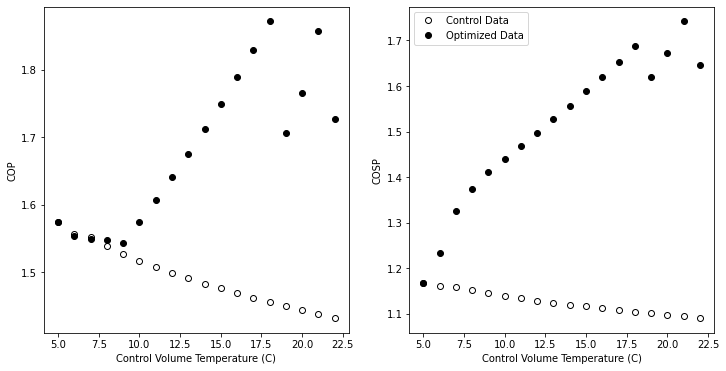

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))

ax[1].plot(controlData['Pod T (K)'] - 273.15, controlData['COSP'], 'ok', markerfacecolor='none')
ax[1].plot(optimizeData['Pod T (K)'] - 273.15, optimizeData['COSP'],'ok')
ax[1].legend(['Control Data', 'Optimized Data'])
ax[1].set_xlabel('Control Volume Temperature (C)')
ax[1].set_ylabel('COSP')

ax[0].plot(controlData['Pod T (K)'] - 273.15, controlData['Q_L (W)'] / controlData['Compressor Work (W)'], 'ok', markerfacecolor='none')
ax[0].plot(optimizeData['Pod T (K)'] - 273.15, optimizeData['Q_L (W)'] / optimizeData['Compressor Work (W)'],'ok')
ax[0].set_xlabel('Control Volume Temperature (C)')
ax[0].set_ylabel('COP')

plt.savefig('figures/optimizedata COSP bad')

In [5]:
# fixData = pd.read_pickle(path + 'fixDataframe.pkl')

# for index, row in fixData.iterrows():
    
#     Var = np.array([row['P (Pa)'][1],
#                     row['P (Pa)'][0],
#                     row['T (K)'][8] - row['T (K)'][7],
#                     row['Compressor RPM'],
#                     row['Condesner Fan RPM'],
#                     row['Evaporator Fan RPM'],
#                     ])
    
#     Inputs = np.array([
#                        row['Ambient T (K)'],
#                        row['Pod T (K)'],
#                        row['Q_L (W)'],
#                       ])

#     Param = np.array([
#                      ])

#     [Vars, COSP] =  of.adjust_cycle_fmin(Var, Inputs, Param)
    
#     [P, T, h, s, abscissa, m_dot, Q_L, Q_H, W_comp, W_fan_c, W_fan_e, COSP, Deficit] = of.make_cycle(Vars, Inputs, Param)
    
    

#     optimizeData = optimizeData.append(pd.DataFrame({'Ambient T (K)': row['Ambient T (K)'], 'Pod T (K)': row['Pod T (K)'], 'P (Pa)': [P], 
#                                                      'T (K)': [T], 'h (j/kg)': [h], 's (j/kg K)': [s], 'abcissa': [abscissa], 
#                                                      'Mass Flux (kg/s)': [m_dot], 'Q_L (W)': Q_L, 'Q_H (W)': Q_H, 'Compressor Work (W)': W_comp, 
#                                                      'Condenser Fan Work': W_fan_c, 'Evapoator Fan Work': W_fan_e, 'COSP': COSP, 
#                                                      'Compressor RPM': Vars[3], 'Condesner Fan RPM': Vars[4], 'Evaporator Fan RPM': Vars[5],
#                                                      'Deficits': [Deficit]}))

#     print(Deficit)
#     print(m_dot)

# #     thermodynamic_plots(optimizeData.iloc[-1], lgnd = ['Vapor Dome', 'Ambient Temperature',
# #                                                       'Pod Temperature', 'Refrigeration Cycle Model',], annotate = False, style = ['r-', None])
    
# # Replace data with better min
# optimizeData = optimizeData.drop(range(14,18), axis =0)
# optimizeData = optimizeData.reset_index()
# optimizeData = optimizeData.drop('level_0', axis = 1)
# optimizeData = optimizeData.drop('index', axis = 1)
# optimizeData.to_pickle(path + 'optimizeDataframe.pkl')
    
# optimizeData = pd.read_pickle(path + 'optimizeDataframe.pkl')

In [6]:
# extendData = pd.read_pickle(path + 'extendDataframe.pkl')

# for index, row in extendData.iterrows():
        
#     Var = np.array([row['P (Pa)'][1],
#                     row['P (Pa)'][0],
#                     row['T (K)'][8] - row['T (K)'][7],
#                     row['Compressor RPM'],
#                     row['Condesner Fan RPM'],
#                     row['Evaporator Fan RPM'],
#                     ])
    
#     Inputs = np.array([
#                        row['Ambient T (K)'],
#                        row['Pod T (K)'],
#                        row['Q_L (W)'],
#                       ])

#     Param = np.array([
#                      ])

#     [Vars, COSP] =  of.adjust_cycle_fmin(Var, Inputs, Param)
    
#     [P, T, h, s, abscissa, m_dot, Q_L, Q_H, W_comp, W_fan_c, W_fan_e, COSP, Deficit] = of.make_cycle(Vars, Inputs, Param)
    
    

#     optimizeData = optimizeData.append(pd.DataFrame({'Ambient T (K)': row['Ambient T (K)'], 'Pod T (K)': row['Pod T (K)'], 'P (Pa)': [P], 
#                                                      'T (K)': [T], 'h (j/kg)': [h], 's (j/kg K)': [s], 'abcissa': [abscissa], 
#                                                      'Mass Flux (kg/s)': [m_dot], 'Q_L (W)': Q_L, 'Q_H (W)': Q_H, 'Compressor Work (W)': W_comp, 
#                                                      'Condenser Fan Work': W_fan_c, 'Evapoator Fan Work': W_fan_e, 'COSP': COSP, 
#                                                      'Compressor RPM': Vars[3], 'Condesner Fan RPM': Vars[4], 'Evaporator Fan RPM': Vars[5],
#                                                      'Deficits': [Deficit]}))

#     print(Deficit)
#     print(m_dot)

#     thermodynamic_plots(optimizeData.iloc[-1], lgnd = ['Vapor Dome', 'Ambient Temperature',
#                                                       'Pod Temperature', 'Refrigeration Cycle Model',], annotate = False, style = ['r-', None])
# optimizeData = optimizeData.reset_index()
# optimizeData = optimizeData.drop('index', axis = 1)
# optimizeData.to_pickle(path + 'optimizeDataframe.pkl')
optimizeData = pd.read_pickle(path + 'optimizeDataframe.pkl')

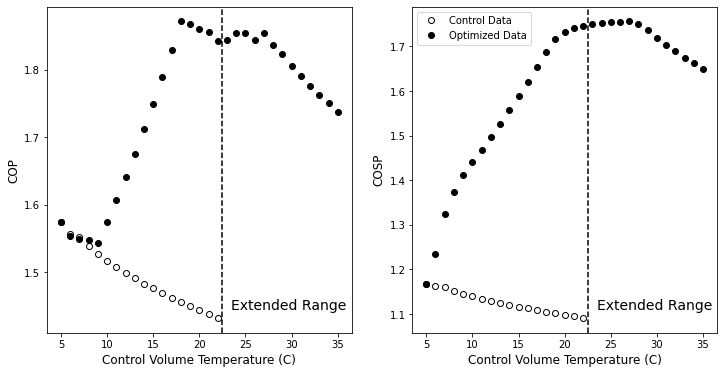

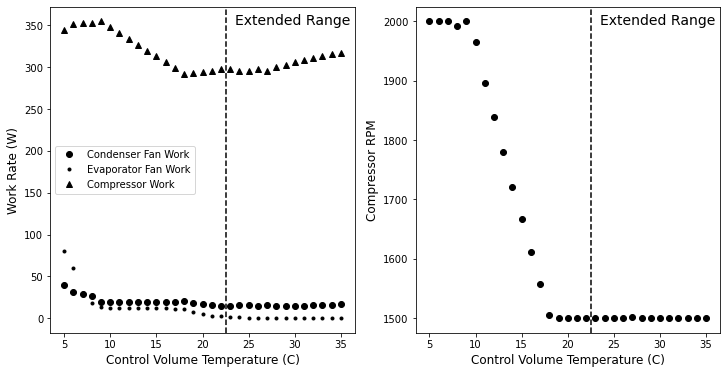

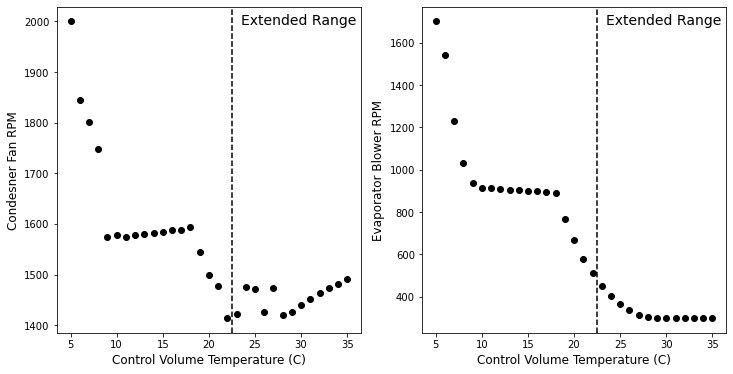

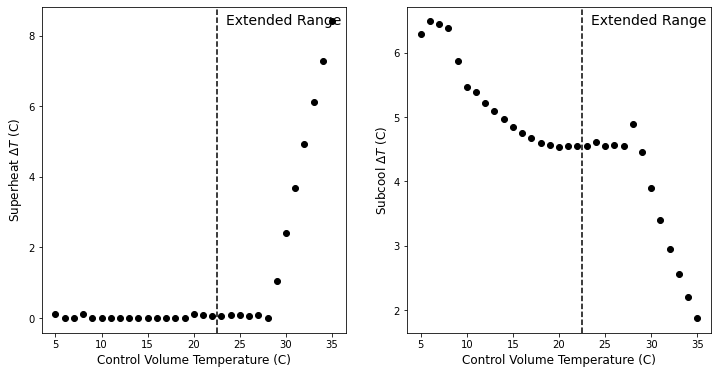

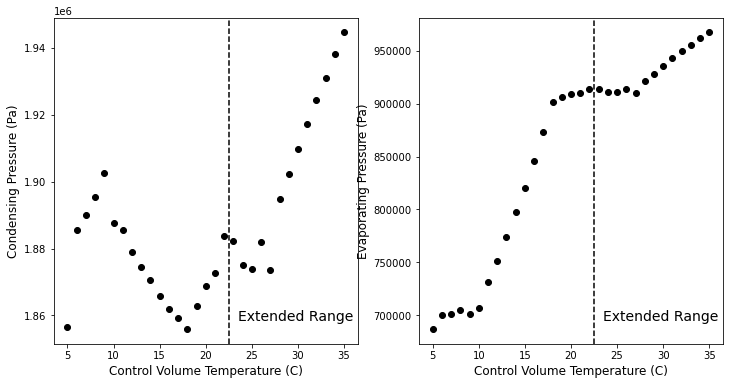

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))

ax[1].plot(controlData['Pod T (K)'] - 273.15, controlData['COSP'], 'ok', markerfacecolor='none')
ax[1].plot(optimizeData['Pod T (K)'] - 273.15, optimizeData['COSP'],'ok')
lims = ax[1].get_ylim()
ax[1].set_ylim(lims)
ax[1].plot([22.5, 22.5], lims, 'k--')
ax[1].annotate('Extended Range',
               xy=(1.05, 0), xycoords='axes fraction',
               xytext=(-20, 20), textcoords='offset pixels',
               horizontalalignment='right',
               size=14,
               verticalalignment='bottom')
ax[1].legend(['Control Data', 'Optimized Data'])
ax[1].set_xlabel('Control Volume Temperature (C)', fontsize=12)
ax[1].set_ylabel('COSP', fontsize=12)

ax[0].plot(controlData['Pod T (K)'] - 273.15, controlData['Q_L (W)'] / controlData['Compressor Work (W)'], 'ok', markerfacecolor='none')
ax[0].plot(optimizeData['Pod T (K)'] - 273.15, optimizeData['Q_L (W)'] / optimizeData['Compressor Work (W)'],'ok')
lims = ax[0].get_ylim()
ax[0].set_ylim(lims)
ax[0].plot([22.5, 22.5], lims, 'k--')
ax[0].annotate('Extended Range',
               xy=(1.05, 0), xycoords='axes fraction',
               xytext=(-20, 20), textcoords='offset pixels',
               horizontalalignment='right',
               size=14,
               verticalalignment='bottom')
ax[0].set_xlabel('Control Volume Temperature (C)', fontsize=12)
ax[0].set_ylabel('COP', fontsize=12)


plt.savefig('figures/optimizedata COSP')

fig, ax = plt.subplots(1, 2, figsize = (12,6))

ax[0].plot(optimizeData['Pod T (K)'] - 273.15, optimizeData['Condenser Fan Work'],'ok')
ax[0].plot(optimizeData['Pod T (K)'] - 273.15, optimizeData['Evapoator Fan Work'],'.k')
ax[0].plot(optimizeData['Pod T (K)'] - 273.15, optimizeData['Compressor Work (W)'],'^k')
lims = ax[0].get_ylim()
ax[0].set_ylim(lims)
ax[0].plot([22.5, 22.5], lims, 'k--')
ax[0].annotate('Extended Range',
               xy=(1.05, 0.875), xycoords='axes fraction',
               xytext=(-20, 20), textcoords='offset pixels',
               horizontalalignment='right',
               size=14,
               verticalalignment='bottom')
ax[0].legend(['Condenser Fan Work', 'Evaporator Fan Work', 'Compressor Work'])
ax[0].set_xlabel('Control Volume Temperature (C)', fontsize=12)
ax[0].set_ylabel('Work Rate (W)', fontsize=12)

ax[1].plot(optimizeData['Pod T (K)'] - 273.15, optimizeData['Compressor RPM'],'ok')
ax[1].set_xlabel('Control Volume Temperature (C)', fontsize=12)
ax[1].set_ylabel('Compressor RPM', fontsize=12)
lims = ax[1].get_ylim()
ax[1].set_ylim(lims)
ax[1].plot([22.5, 22.5], lims, 'k--')
ax[1].annotate('Extended Range',
               xy=(1.05, 0.875), xycoords='axes fraction',
               xytext=(-20, 20), textcoords='offset pixels',
               horizontalalignment='right',
               size=14,
               verticalalignment='bottom')


plt.savefig('figures/optimizedata compr RPM and W')

fig, ax = plt.subplots(1, 2, figsize = (12,6))

ax[0].plot(optimizeData['Pod T (K)'] - 273.15, optimizeData['Condesner Fan RPM'],'ok')
lims = ax[0].get_ylim()
ax[0].set_ylim(lims)
ax[0].plot([22.5, 22.5], lims, 'k--')
ax[0].annotate('Extended Range',
               xy=(1.05, 0.875), xycoords='axes fraction',
               xytext=(-20, 20), textcoords='offset pixels',
               horizontalalignment='right',
               size=14,
               verticalalignment='bottom')
ax[0].set_xlabel('Control Volume Temperature (C)', fontsize=12)
ax[0].set_ylabel('Condesner Fan RPM', fontsize=12)

ax[1].plot(optimizeData['Pod T (K)'] - 273.15, optimizeData['Evaporator Fan RPM'],'ok')
lims = ax[1].get_ylim()
ax[1].set_ylim(lims)
ax[1].plot([22.5, 22.5], lims, 'k--')
ax[1].annotate('Extended Range',
               xy=(1.05, 0.875), xycoords='axes fraction',
               xytext=(-20, 20), textcoords='offset pixels',
               horizontalalignment='right',
               size=14,
               verticalalignment='bottom')
ax[1].set_xlabel('Control Volume Temperature (C)', fontsize=12)
ax[1].set_ylabel('Evaporator Blower RPM', fontsize=12)
plt.savefig('figures/optimizedata HX RPM')

T_SH = []
T_SC = []
for index, row in optimizeData.iterrows():
    T_SH.append(row['T (K)'][0] - row['T (K)'][-2])
    T_SC.append(row['T (K)'][3] - row['T (K)'][4])
    
fig, ax = plt.subplots(1, 2, figsize = (12,6))
    
ax[0].plot(optimizeData['Pod T (K)'] - 273.15, T_SH,'ko')
lims = ax[0].get_ylim()
ax[0].set_ylim(lims)
ax[0].plot([22.5, 22.5], lims, 'k--')
ax[0].annotate('Extended Range',
               xy=(1.05, 0.875), xycoords='axes fraction',
               xytext=(-20, 20), textcoords='offset pixels',
               horizontalalignment='right',
               size=14,
               verticalalignment='bottom')
ax[0].set_xlabel('Control Volume Temperature (C)', fontsize=12)
ax[0].set_ylabel('Superheat $\Delta T$ (C)', fontsize=12)
# ax[0].set_ylim([-1, 5])

ax[1].plot(optimizeData['Pod T (K)'] - 273.15, T_SC,'ko')
lims = ax[1].get_ylim()
ax[1].set_ylim(lims)
ax[1].plot([22.5, 22.5], lims, 'k--')
ax[1].annotate('Extended Range',
               xy=(1.05, 0.875), xycoords='axes fraction',
               xytext=(-20, 20), textcoords='offset pixels',
               horizontalalignment='right',
               size=14,
               verticalalignment='bottom')
ax[1].set_xlabel('Control Volume Temperature (C)', fontsize=12)
ax[1].set_ylabel('Subcool $\Delta T$ (C)', fontsize=12)
# ax[1].set_ylim([0, 10])
plt.savefig('figures/optimizedata SH SC')

P_c = []
P_e = []
for index, row in optimizeData.iterrows():
    P_c.append(row['P (Pa)'][1])
    P_e.append(row['P (Pa)'][0])
    
fig, ax = plt.subplots(1, 2, figsize = (12,6))
    
ax[0].plot(optimizeData['Pod T (K)'] - 273.15, P_c,'ko')
lims = ax[0].get_ylim()
ax[0].set_ylim(lims)
ax[0].plot([22.5, 22.5], lims, 'k--')
ax[0].annotate('Extended Range',
               xy=(1.05, 0), xycoords='axes fraction',
               xytext=(-20, 20), textcoords='offset pixels',
               horizontalalignment='right',
               size=14,
               verticalalignment='bottom')
ax[0].set_xlabel('Control Volume Temperature (C)', fontsize=12)
ax[0].set_ylabel('Condensing Pressure (Pa)', fontsize=12)

ax[1].plot(optimizeData['Pod T (K)'] - 273.15, P_e,'ko')
lims = ax[1].get_ylim()
ax[1].set_ylim(lims)
ax[1].plot([22.5, 22.5], lims, 'k--')
ax[1].annotate('Extended Range',
               xy=(1.05, 0), xycoords='axes fraction',
               xytext=(-20, 20), textcoords='offset pixels',
               horizontalalignment='right',
               size=14,
               verticalalignment='bottom')
ax[1].set_xlabel('Control Volume Temperature (C)', fontsize=12)
ax[1].set_ylabel('Evaporating Pressure (Pa)', fontsize=12)
plt.savefig('figures/optimizedata P_c P_e')


Text(0, 0.5, 'COSP')

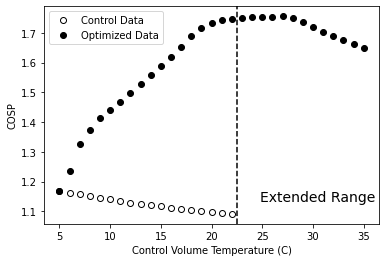

In [17]:
fig = plt.figure()
plt.plot(controlData['Pod T (K)'] - 273.15, controlData['COSP'], 'ok', markerfacecolor='none')
ax = plt.plot(optimizeData['Pod T (K)'] - 273.15, optimizeData['COSP'],'ok')
lims = plt.gca().get_ylim()
plt.ylim(lims)
plt.plot([22.5, 22.5], lims, 'k--')
plt.annotate('Extended Range',
               xy=(1.05, 0), xycoords='axes fraction',
               xytext=(-20, 20), textcoords='offset pixels',
               horizontalalignment='right',
               size=14,
               verticalalignment='bottom')
plt.legend(['Control Data', 'Optimized Data'])
plt.xlabel('Control Volume Temperature (C)')
plt.ylabel('COSP')

In [8]:
# extendData = pd.read_pickle(path + 'extendDataframe.pkl')
# # optimizeData = pd.DataFrame()

# for index, row in extendData.iterrows():
    
#     Var = np.array([row['P (Pa)'][1],
#                     row['P (Pa)'][0],
#                     row['T (K)'][-1] - row['T (K)'][-2],
#                     1500,
#                     750, 
#                     1200 
#                     ])
    
#     Inputs = np.array([
#                        row['Ambient T (K)'],
#                        row['Pod T (K)'],
#                        row['Q_L (W)'],
#                       ])

#     Param = np.array([
#                      ])

#     [Vars, COSP] =  of.adjust_cycle_fmin(Var, Inputs, Param)
    
#     [P, T, h, s, abscissa, m_dot, Q_L, Q_H, W_comp, W_fan_c, W_fan_e, COSP, Deficit] = of.make_cycle(Vars, Inputs, Param)
    
    

#     optimizeData = optimizeData.append(pd.DataFrame({'Ambient T (K)': row['Ambient T (K)'], 'Pod T (K)': row['Pod T (K)'], 'P (Pa)': [P], 
#                                                      'T (K)': [T], 'h (j/kg)': [h], 's (j/kg K)': [s], 'abcissa': [abscissa], 
#                                                      'Mass Flux (kg/s)': [m_dot], 'Q_L (W)': Q_L, 'Q_H (W)': Q_H, 'Compressor Work (W)': W_comp, 
#                                                      'Condenser Fan Work': W_fan_c, 'Evapoator Fan Work': W_fan_e, 'COSP': COSP, 
#                                                      'Compressor RPM': Vars[3], 'Condesner Fan RPM': Vars[4], 'Evaporator Fan RPM': Vars[5],
#                                                      'Deficits': [Deficit]}))

#     print(Deficit)
#     print(m_dot)

#     thermodynamic_plots(optimizeData.iloc[-1], lgnd = ['Vapor Dome', 'Ambient Temperature',
#                                                       'Pod Temperature', 'Refrigeration Cycle Model',], annotate = False, style = ['r-', None])

# optimizeData = optimizeData.reset_index()  
# # optimizeData.to_pickle(path + 'optimizeDataframe.pkl')
# # optimizeData = pd.read_pickle(path + 'optimizeDataframe.pkl')

In [9]:
# # list
# files =['02-01-2021/test2.lvm', '02-01-2021/test3.lvm', '02-01-2021/test4.lvm',
#         '02-06-2021/test.txt', '02-06-2021/test2.lvm', '02-06-2021/test3.lvm',
#         '02-18-2021/test.lvm', '02-18-2021/test2.lvm', '02-18-2021/test3.lvm'
#        ]

# P_amb = [101.68e3, 101.60e3, 101.50e3,
#          100.84e3, 100.87e3, 100.87e3,
#          102.92e3, 102,89e3, 102.79e3
#         ] # Pa

# Q_element = [0.50e3, 0.50e3, 0.50e3,
#              0.4e3, 0.4e3, 0.4e3,
#              0.30e3, 0.30e3, 0.30e3
#             ] # (Wh)

# W_refrig = [0.120e3, 0.126e3, 0.125e3,
#             0.113e3, 0.114e3, 0.120e3,
#             0.092e3, 0.103e3, 0.094e3
#            ] # (Wh)

# cycleData = pd.DataFrame()

# for ind, file in enumerate(files):

#     cycleData = cycleData.append(experimental_analysis_cycle(path + file, P_amb[ind], Q_element[ind], W_refrig[ind], offset = 1.9))

# cycleData = cycleData.reset_index()
        
# cycleData.to_pickle(path + 'cycleDataframe.pkl')

# # cycleData = pd.read_pickle(path + 'cycleDataframe.pkl')

In [10]:
# compareData = pd.DataFrame()

# T_amb = np.linspace(-5, 20, 6) + 277.15
# T_pod = 273.15 + 17
# Q = 550


# for index, row in cycleData.iterrows():
    
#     Inputs = np.array([
#                        row['Ambient T (K)'],
#                        row['Pod T (K)'],
#                        row['Q_L (W)'],
#                       ])
    

#     Param = np.array([
#                      ])
    
    
#     [P, T, h, s, abscissa, m_dot, Q_L, Q_H, W_comp, W_fan_c, W_fan_e, COSP, Deficit, Vars] = of2.solve_cycle_shotgun(Inputs, Param)
    
    

#     compareData = compareData.append(pd.DataFrame({'Ambient T (K)': row['Ambient T (K)'], 'Pod T (K)': row['Pod T (K)'], 'P (Pa)': [P], 
#                                                      'T (K)': [T], 'h (j/kg)': [h], 's (j/kg K)': [s], 'abcissa': [abscissa], 
#                                                      'Mass Flux (kg/s)': [m_dot], 'Q_L (W)': Q_L, 'Q_H (W)': Q_H, 'Compressor Work (W)': W_comp, 
#                                                      'Condenser Fan Work': W_fan_c, 'Evapoator Fan Work': W_fan_e, 'COSP': COSP, 
#                                                      'Compressor RPM': Vars[3], 'Condesner Fan RPM': Vars[4], 'Evaporator Fan RPM': Vars[5],
#                                                      'Deficits': [Deficit]}))

#     print(Deficit)
#     print(m_dot)
#     print(Vars)

#     thermodynamic_plots(compareData.iloc[-1], lgnd = ['Vapor Dome', 'Ambient Temperature',
#                                                       'Pod Temperature', 'Refrigeration Cycle Model',], annotate = False, style = ['ro-', None])
# compareData = compareData.reset_index()
    
# compareData.to_pickle(path + 'compareDataframe.pkl')
# compareData = pd.read_pickle(path + 'compareDataframe.pkl')

# Discussion

The results in figure 2 from first experiment show that even with the immersion thermocouples the temperatures at all 4 points are being significantly affected by the temperature gradient with respect to the ambient air. At points 2’ and 5’ the temperatures are well below what would be expected, especially the temperature at point 5’ which if correct would indicate that after compression the refrigerant is still a subcooled liquid. At points 1’ and 6’ the temperatures are above what would be expected for the given pressure and indicate a superheated gas.  This cannot be the case at point 6’ since liquid R-410a exits the Schrader valve when connecting and disconnecting to the port. Due to the high pressure and small diameter of the refrigeration tubing it is not possible to immerse the thermocouples directly into the flow, as a consequence stagnation of the flow may occur in the Schrader valve ports, which in turn leads to the fluid being acted on by the ambient temperature gradient and causing measurement errors

Figure 3 shows a similar result to plots in figure 2. At all points the temperature measurements seem to be experiencing significant error caused by the ambient temperature gradient. It should be noted the temperature at point 2’, which was measured using a surface mount thermocouple, increased substantially but still indicates the fluid to be a subcooled liquid after compression.

Figure 4 shows the results from using all surface mount thermocouples adhered to the refrigerant tubing using thermal paste. The results are significantly better with pressures and temperatures indicating reasonable thermodynamic values for a vapor compression refrigeration cycle. Point 1’ suggests there is little to no superheat occurring during evaporation, point 2’ shows some entropy loss during compression but also superheated gas. Points 5’ and 6’ show values to be expected with significant subcooling after condensation and a nearly saturated refrigerant after expansion. Considering that the temperature difference between a saturated liquid and saturated gas at the evaporating pressure is less than 0.12 degrees K it will be nearly impossible to capture the vapor quality of a mixture after expansion.

- Sight Glass: Emerson Climate AMI-1TT2 
- Drier Filter: Emerson Climate EK 032
- Flow Meter: Emerson  F025S + 1700 transmitter


Work on the controlling unit for the thermal management system has begun and a siemens programmable logic ontroller (PLC) has been selected and ordered. This PLC will work predominately in feedback loops to ensure a reasonable superheat temperature is maintained in the thermal management system as well as monitoring the interior of the POD and protecting the electronics by means of shut off and bypass valves.

- Siemens LOGO! RCE 12/24

# Conclusion and Next Steps

It can be concluded from the results above that the VCRC model predicts accurate working pressures for the refrigeration cycle when the component functions accurately describe the parameters and geometric characteristics of the system. It also be concluded that the experimental temperature measurements need to be improved for better assessment of the VCRC model’s accuracy. 

The next steps for this project are to run additional validation tests with the immersed thermocouples, and to program the siemens logic controller to interface with the thermal management system’s sensors and controllers.
